In [1]:
#libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the old and the new clients dataset to the dataframe

old_clients = pd.read_csv("t.old.csv", sep=';')
new_clients = pd.read_csv("t.new.csv", sep=';')

old_clients.head()

,Age,Government Sector Worker,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


In [6]:
new_clients.head()

,Age,Government Sector Worker,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,25,0,0,1150000,4,0,0,0
1,34,0,1,1500000,4,1,1,1
2,33,0,1,1500000,3,0,1,1
3,28,0,1,1150000,3,0,0,0
4,33,1,1,400000,5,1,0,0


In [9]:
#0ld clients nulls and duplicates

old_clients.isna().sum()

Age                         0
Government Sector Worker    0
GraduateOrNot               0
AnnualIncome                0
FamilyMembers               0
ChronicDiseases             0
FrequentFlyer               0
EverTravelledAbroad         0
TravelInsurance             0
dtype: int64

In [10]:
#drop duplicates from old clients

old_clients.drop_duplicates(inplace=True)
old_clients = old_clients.reset_index()

In [11]:
old_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   index                     570 non-null    int64
 1   Age                       570 non-null    int64
 2   Government Sector Worker  570 non-null    int64
 3   GraduateOrNot             570 non-null    int64
 4   AnnualIncome              570 non-null    int64
 5   FamilyMembers             570 non-null    int64
 6   ChronicDiseases           570 non-null    int64
 7   FrequentFlyer             570 non-null    int64
 8   EverTravelledAbroad       570 non-null    int64
 9   TravelInsurance           570 non-null    int64
dtypes: int64(10)
memory usage: 44.7 KB


In [3]:
#Analyze and visualize data

#Preprocessing the categorical data for 0's and 1's to Yes or No



from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_cols =['Government Sector Worker','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']
for category in cat_cols:
    old_clients[category]=le.fit_transform(old_clients[category])


In [20]:
old_clients

,index,Age,Government Sector Worker,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
565,674,27,1,1,850000,2,0,0,0,0
566,676,29,0,1,1200000,7,1,0,0,0
567,677,27,0,0,450000,7,0,0,0,0
568,680,29,0,1,1100000,4,1,0,1,1


In [21]:
new_clients

,Age,Government Sector Worker,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,25,0,0,1150000,4,0,0,0
1,34,0,1,1500000,4,1,1,1
2,33,0,1,1500000,3,0,1,1
3,28,0,1,1150000,3,0,0,0
4,33,1,1,400000,5,1,0,0
...,...,...,...,...,...,...,...,...
1298,33,0,1,1500000,4,0,1,1
1299,28,0,1,1750000,5,1,0,1
1300,28,0,1,1150000,6,1,0,0
1301,34,0,1,1000000,6,0,1,1


In [4]:
cat_cols =['Government Sector Worker','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']
for category in cat_cols:
    new_clients[category]=le.fit_transform(new_clients[category])

In [23]:
new_clients

,Age,Government Sector Worker,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,25,0,0,1150000,4,0,0,0
1,34,0,1,1500000,4,1,1,1
2,33,0,1,1500000,3,0,1,1
3,28,0,1,1150000,3,0,0,0
4,33,1,1,400000,5,1,0,0
...,...,...,...,...,...,...,...,...
1298,33,0,1,1500000,4,0,1,1
1299,28,0,1,1750000,5,1,0,1
1300,28,0,1,1150000,6,1,0,0
1301,34,0,1,1000000,6,0,1,1


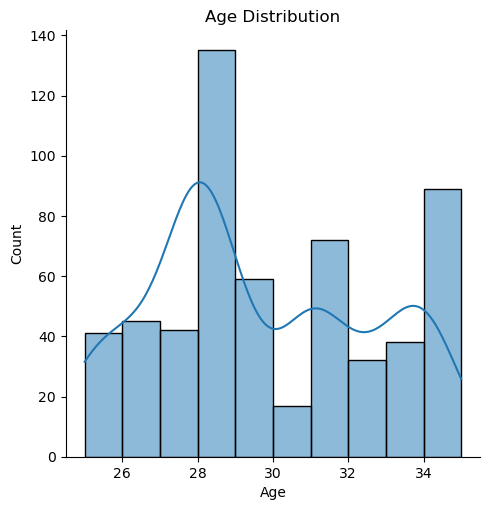

In [57]:
#visualizing

    #Distributions of numerical data
    
#Age Distribution

sns.displot(x='Age', data=old_clients, bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

(array([ 200000.,  400000.,  600000.,  800000., 1000000., 1200000.,
        1400000., 1600000., 1800000., 2000000.]),
 [Text(200000.0, 0, '0.2'),
  Text(400000.0, 0, '0.4'),
  Text(600000.0, 0, '0.6'),
  Text(800000.0, 0, '0.8'),
  Text(1000000.0, 0, '1.0'),
  Text(1200000.0, 0, '1.2'),
  Text(1400000.0, 0, '1.4'),
  Text(1600000.0, 0, '1.6'),
  Text(1800000.0, 0, '1.8'),
  Text(2000000.0, 0, '2.0')])

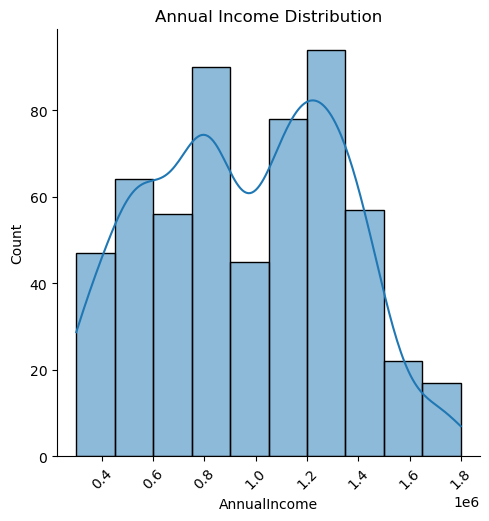

In [55]:
#Annual Income Dstribution

sns.displot(old_clients["AnnualIncome"], bins=10, kde=True)
xim=(0,2000000)
plt.title("Annual Income Distribution")
plt.xticks(rotation = 45)

<function matplotlib.pyplot.show(close=None, block=None)>

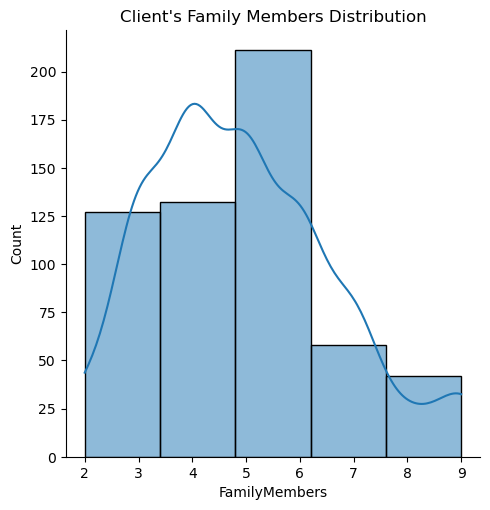

In [62]:
#Family Members Distribution

sns.displot(old_clients["FamilyMembers"], bins=5, kde=True)
plt.title("Client's Family Members Distribution")
plt.show

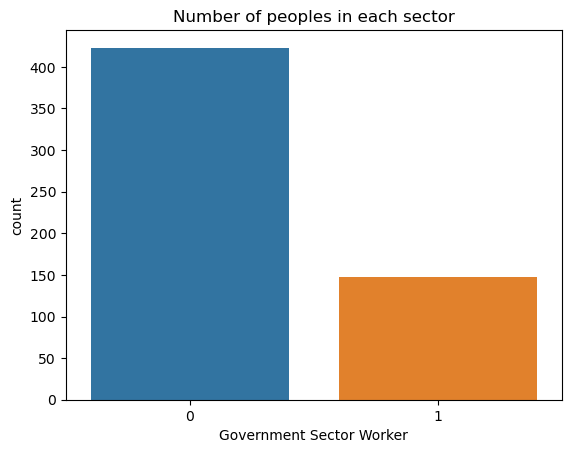

In [64]:
#Plotting categorical data

#Type of employment. No. of people in the government sector or the alternative
#Government Sector Worker

sns.countplot(x = 'Government Sector Worker', data=old_clients)
plt.title('Number of peoples in each sector')
plt.show()

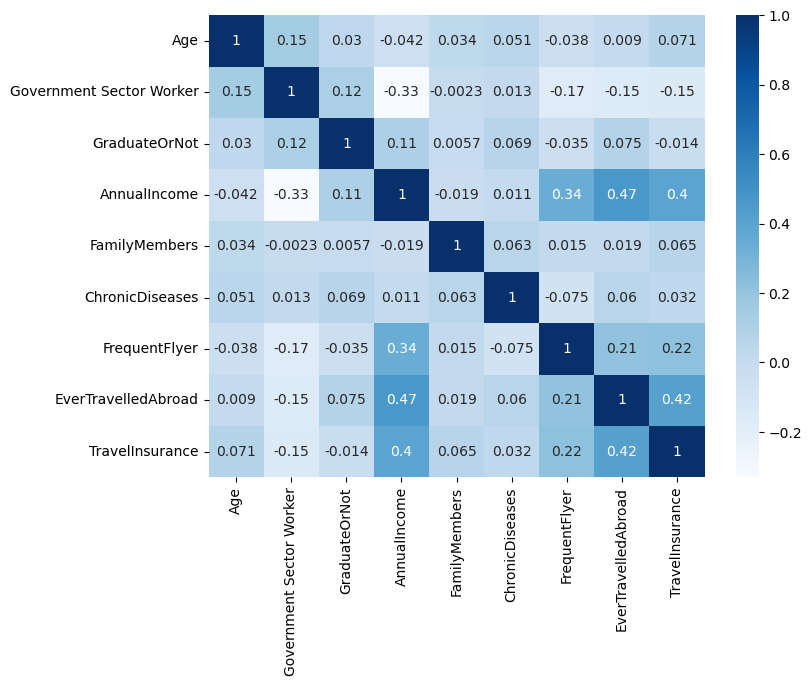

In [6]:
#Finding correlations:

old_clients.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(old_clients.corr(), annot=True, cmap='Blues')
plt.show()

In [7]:
#Preprocessing data for prediction

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Identifying categorical and numerical columns

num_cols = ['Age', 'AnnualIncome', 'FamilyMembers']
cat_cols = ['Government Sector Worker', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']

In [43]:
#Split the Data into Training and Testing Sets

y = old_clients['TravelInsurance']
X = old_clients.drop('TravelInsurance', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Training dataset: {X_train.shape}')
print(f'Testing dataset: {X_test.shape}')

Training dataset: (477, 8)
Testing dataset: (205, 8)


In [42]:

#Creating and training the models using using the scikit-learn library

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score

#create the models and evaluate them using accuracy scores and f1 scores

#1. Logistic Regression:

model1 = LogisticRegression(random_state=0)
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_model1))
print('F1 Score: ', f1_score(y_test, y_pred_model1))

Accuracy:  0.6861313868613139
F1 Score:  0.0


In [39]:
#2. RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_model2))
print('F1 Score: ', f1_score(y_test, y_pred_model2))

Accuracy:  0.8175182481751825
F1 Score:  0.6666666666666666


In [40]:
#3. KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors = 5)
model3.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_model3))
print('F1 Score: ', f1_score(y_test, y_pred_model3))

Accuracy:  0.7883211678832117
F1 Score:  0.6027397260273971


In [46]:
#4. Gradient Boosting
model4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0)
model4.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_model4))
print('F1 Score: ', f1_score(y_test, y_pred_model4))

Accuracy:  0.8146341463414634
F1 Score:  0.6666666666666666


In [47]:
#PREDICTING THE OUTPUT OF NEW CLIENTS DATA using Random Forest Classifier

new_data = model2.predict(new_clients)

In [48]:
new_clients['predictedTravelInsurane'] = new_data

In [49]:
new_clients.head(10)

,Age,Government Sector Worker,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,predictedTravelInsurane
0,25,0,0,1150000,4,0,0,0,0
1,34,0,1,1500000,4,1,1,1,1
2,33,0,1,1500000,3,0,1,1,1
3,28,0,1,1150000,3,0,0,0,0
4,33,1,1,400000,5,1,0,0,0
5,27,1,1,500000,7,0,0,0,0
6,33,0,1,1400000,8,0,0,1,1
7,31,0,1,950000,3,0,1,0,0
8,31,1,0,300000,6,0,0,0,0
9,27,0,0,800000,5,1,0,0,0
